In [ ]:
# !pip install woma

In [1]:
import woma, inspect
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

In [7]:
# Earth units
M_E = 5.9724e24  # kg
R_E = 6.3710e6  # m

# Set profile inputs
M_t = 0.887 * M_E
M_i = 0.133 * M_E
target_prof = woma.Planet(
    name="target",
    A1_mat_layer=["ANEOS_Fe85Si15", "ANEOS_forsterite"],
    A1_T_rho_type=["adiabatic", "adiabatic"],
    M=M_t,
    A1_M_layer=[M_t * 0.3, M_t * 0.7],
    P_s=1e5,
    T_s=2000,
)
impactor_prof = woma.Planet(
    name="impactor",
    A1_mat_layer=["ANEOS_Fe85Si15", "ANEOS_forsterite"],
    A1_T_rho_type=["adiabatic", "adiabatic"],
    M=M_i,
    A1_M_layer=[M_i * 0.3, M_i * 0.7],
    P_s=1e5,
    T_s=2000,
)

In [8]:
woma.load_eos_tables(
    np.unique(np.append(target_prof.A1_mat_layer, impactor_prof.A1_mat_layer))
)

In [9]:
target_prof.gen_prof_L2_find_R_R1_given_M1_M2(R_min=0.95 * R_E, R_max=1.05 * R_E)
impactor_prof.gen_prof_L2_find_R_R1_given_M1_M2(R_min=0.5 * R_E, R_max=0.6 * R_E)

Trying to build a planet with R=R_min... Success
Trying to build a planet with R=R_max... Success
Iter 9(40): R=0.9998R_E R1=0.51211R_E: tol=0.00055(0.001)  
Tweaking M to avoid density peaks at the center of the planet... Done
Planet "target": 
    M            = 5.2968e+24  kg  = 0.88687  M_earth
    R            = 6.3698e+06  m  = 0.9998  R_earth
    mat          = ["ANEOS_Fe85Si15", "ANEOS_forsterite"] 
    mat_id       = [402, 400] 
    T_rho_type   = ["adiabatic", "adiabatic"] 
    R_layer      = [0.51141, 0.9998]  R_earth
    M_layer      = [0.26614, 0.62073]  M_earth
    M_frac_layer = [0.30009, 0.69991]  M_tot
    idx_layer    = [511, 999] 
    P_s          = 1e+05  Pa
    T_s          = 2000  K
    rho_s        = 3053.2  kg m^-3
    P_1          = 1.1716e+11  Pa
    T_1          = 2759.9  K
    rho_1        = 10006  kg m^-3
    P_0          = 3.1115e+11  Pa
    T_0          = 3647  K
    rho_0        = 12227  kg m^-3
    I_MR2        = 0.32886  M_tot*R_tot^2
Trying to build a

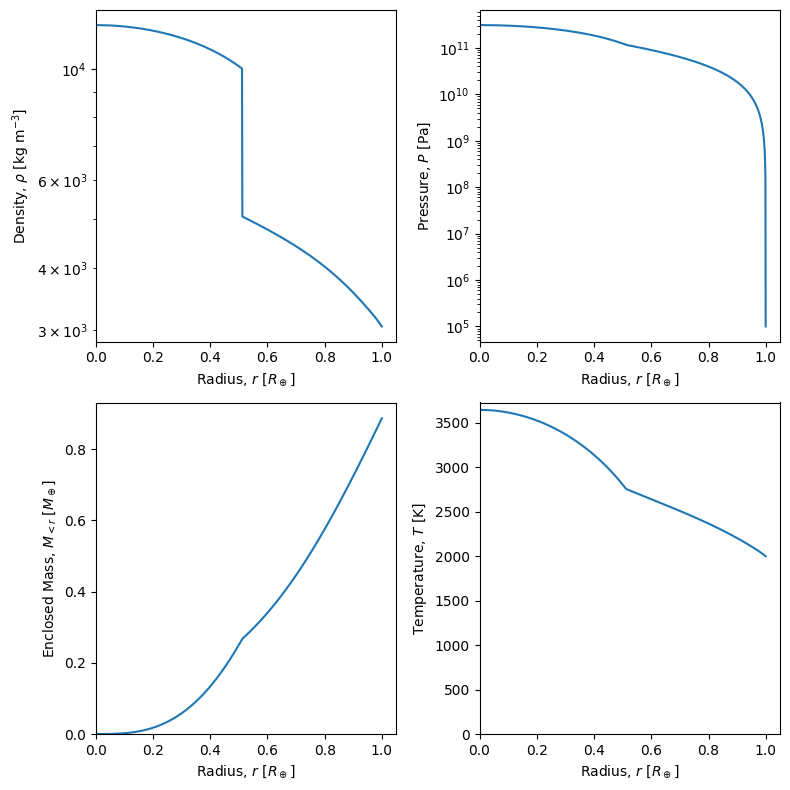

In [10]:
plot_spherical_profiles(target_prof)

In [2]:
!pwd

/home/lacruzen/Desktop/swift-cmgi/Demo3/SpinImpactInitCond


In [3]:
!ls /home/lacruzen/Desktop/swift-cmgi/SpinImpactInitCond

 demo_impact_n50.hdf5		   output_n50_t.txt
 demo_impactor_n50.hdf5		   plot_profiles.py
 demo_impactor_n50.yml		   plot_snapshots.py
 demo_impactor_profile.hdf5	   README.md
 demo_impactor_spin_profile.hdf5   restart
'demo profiles'			   run.sh
 demo_target_n50.hdf5		   snapshots
 demo_target_n50.yml		   statistics.txt
 demo_target_profile.hdf5	   task_level_0.txt
 demo_target_spin_profile.hdf5	   testing.ipynb
 dependency_graph_0.csv		   timesteps.txt
 make_impact_init_cond.py	   unused_parameters.yml
 make_init_cond.py		   used_parameters.yml
 output_n50_i.txt


In [15]:
impactor_data = load("/home/lacruzen/Desktop/swift-cmgi/Demo3/SpinImpactInitCond/demo_impactor_n50.hdf5")
target_data = load("/home/lacruzen/Desktop/swift-cmgi/Demo3/SpinImpactInitCond/demo_target_n50.hdf5")
impact_data = load("/home/lacruzen/Desktop/swift-cmgi/Demo3/SpinImpact/demo_impact_n50.hdf5")

In [11]:
impactor_data.gas

SWIFT dataset at /home/lacruzen/Desktop/swift-cmgi/Demo3/SpinImpactInitCond/demo_impactor_n50.hdf5. 
Available fields: coordinates, densities, density, entropies, internal_energies, internal_energy, masses, material_ids, particle_ids, pressures, smoothing_length, smoothing_lengths, velocities

In [12]:
target_data.gas

SWIFT dataset at /home/lacruzen/Desktop/swift-cmgi/Demo3/SpinImpactInitCond/demo_target_n50.hdf5. 
Available fields: coordinates, densities, density, entropies, internal_energies, internal_energy, masses, material_ids, particle_ids, pressures, smoothing_length, smoothing_lengths, velocities

In [16]:
impact_data.gas

SWIFT dataset at /home/lacruzen/Desktop/swift-cmgi/Demo3/SpinImpact/demo_impact_n50.hdf5. 
Available fields: coordinates, densities, density, internal_energies, internal_energy, masses, material_ids, particle_ids, pressures, smoothing_length, smoothing_lengths, velocities